In [1]:
import pandas as pd
import numpy as np  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('startups final.csv')

In [3]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [5]:
X=df.iloc[:,:-1]
y=df.iloc[:,4]

In [6]:
states=pd.get_dummies(X['State'])

In [7]:
states.head(10)

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
5,0,0,1
6,1,0,0
7,0,1,0
8,0,0,1
9,1,0,0


In [8]:
states=pd.get_dummies(X['State'],drop_first=True)

In [9]:
states.head(10)

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0
5,0,1
6,0,0
7,1,0
8,0,1
9,0,0


In [10]:
X=X.drop('State',axis=1)

In [12]:
X=pd.concat([X,states],axis=1)
X

,R&D Spend,Administration,Marketing Spend,Florida,New York,Florida,New York
0,165349.20,136897.80,471784.10,0,1,0,1
1,162597.70,151377.59,443898.53,0,0,0,0
2,153441.51,101145.55,407934.54,1,0,1,0
3,144372.41,118671.85,383199.62,0,1,0,1
4,142107.34,91391.77,366168.42,1,0,1,0
5,131876.90,99814.71,362861.36,0,1,0,1
6,134615.46,147198.87,127716.82,0,0,0,0
7,130298.13,145530.06,323876.68,1,0,1,0
8,120542.52,148718.95,311613.29,0,1,0,1
9,123334.88,108679.17,304981.62,0,0,0,0


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
lr = LinearRegression()
lr.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
y_pred=lr.predict(X_test)

In [16]:
print(lr.intercept_)

42554.1676177324


In [17]:
print(lr.coef_)

[ 7.73467193e-01  3.28845975e-02  3.66100259e-02 -4.79642080e+02
  3.49684526e+02 -4.79642080e+02  3.49684526e+02]


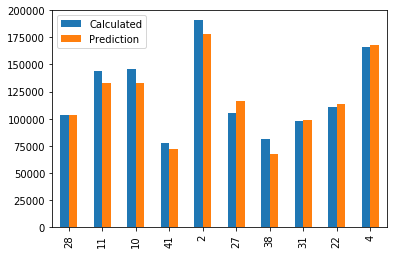

In [18]:
df = pd.DataFrame({'Calculated': y_test, 'Prediction': y_pred})
df_1 = df
df_1.plot(kind='bar')
plt.show()

In [59]:
lr.predict([[17000,20000,5000,1,0]])

array([55584.56781418])

In [61]:
import pickle
filename = 'final_model.sav'
pickle.dump(lr, open(filename, 'wb'))